<a href="https://colab.research.google.com/github/RifkiSstwnn/22_Rifki-Setiawan_PCVK_Sem5_2024/blob/main/Rifki_Setiawan_22_3H_Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

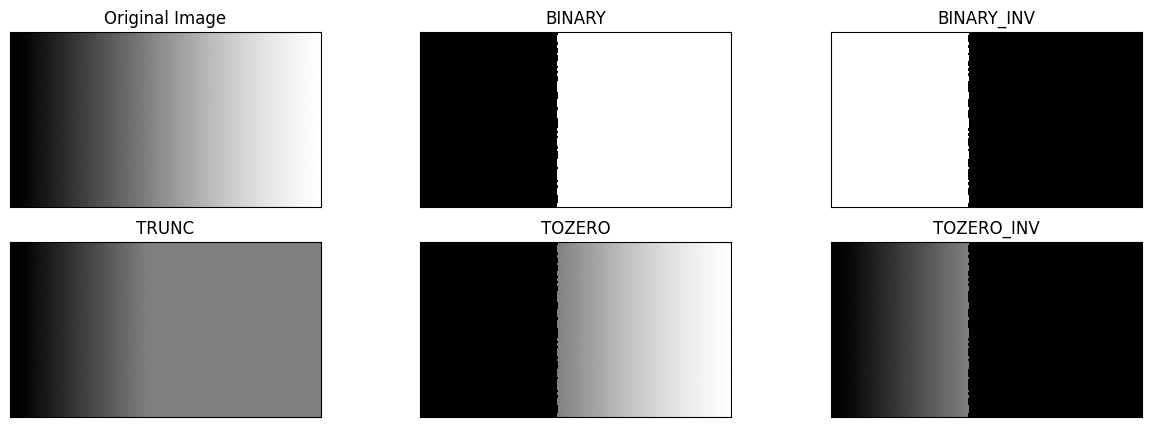

In [3]:
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')

gradient = cv.imread(filename)
thresh = 127 # nilai Threshold yang ditentukan

# 1. thresh1 jika pixel di gradient > 127, maka thresh1 bernilai 1 (putih) selain itu bernilai 0 (hitam)
ret,thresh1 = cv.threshold(gradient,thresh,255,cv.THRESH_BINARY)
# 2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(gradient,thresh,255,cv.THRESH_BINARY_INV)
# 3. Threshold Truncate
ret,thresh3 = cv.threshold(gradient,thresh,255,cv.THRESH_TRUNC)
# 4. Threshold Tozero
ret,thresh4 = cv.threshold(gradient,thresh,255,cv.THRESH_TOZERO)
# 5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(gradient,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gradient, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()


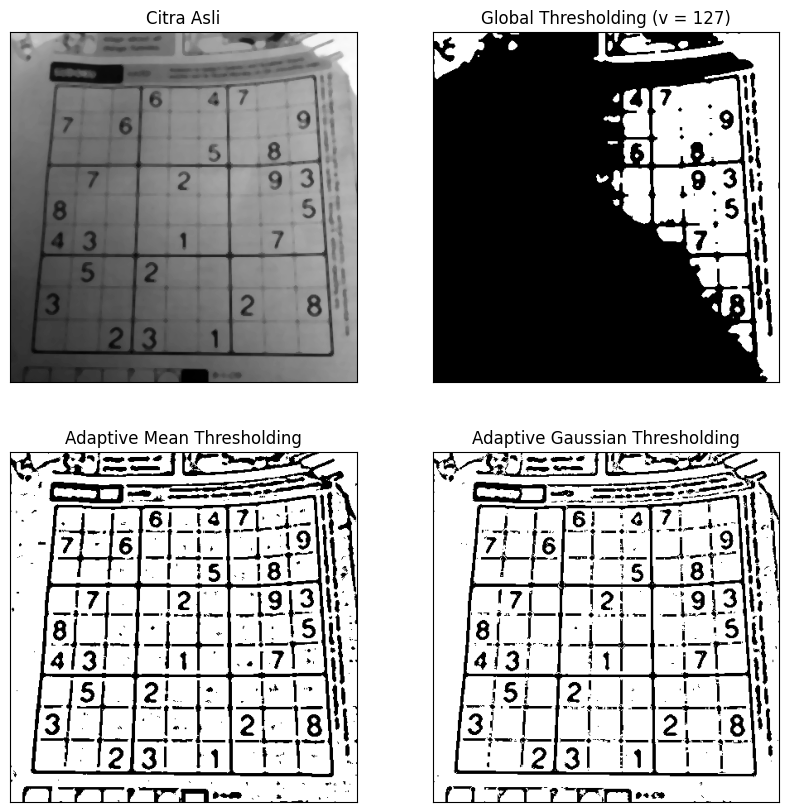

In [4]:
citra = cv.medianBlur(cv.imread('/content/drive/MyDrive/PCVK/Images/sudoku-original.jpg'),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray,5)
thresh = 127

ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

titles = ['Citra Asli', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
  plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

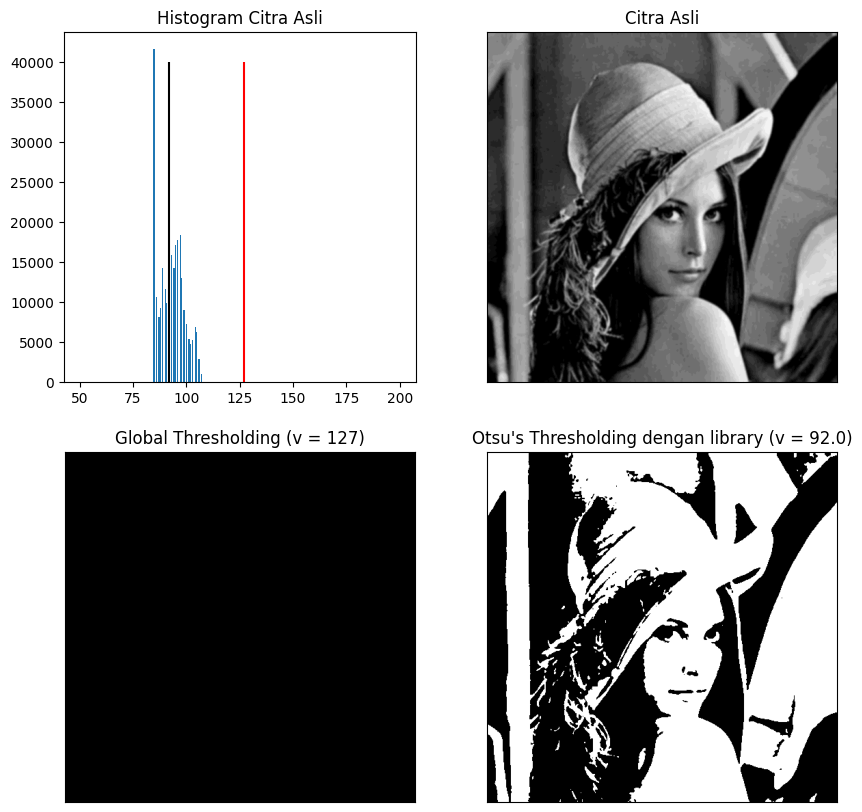

In [5]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_gs_lc2.jpg',0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dengan library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') # garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') # garis vertikal hitam menunjukkan threshold 92 hasil otsu
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()


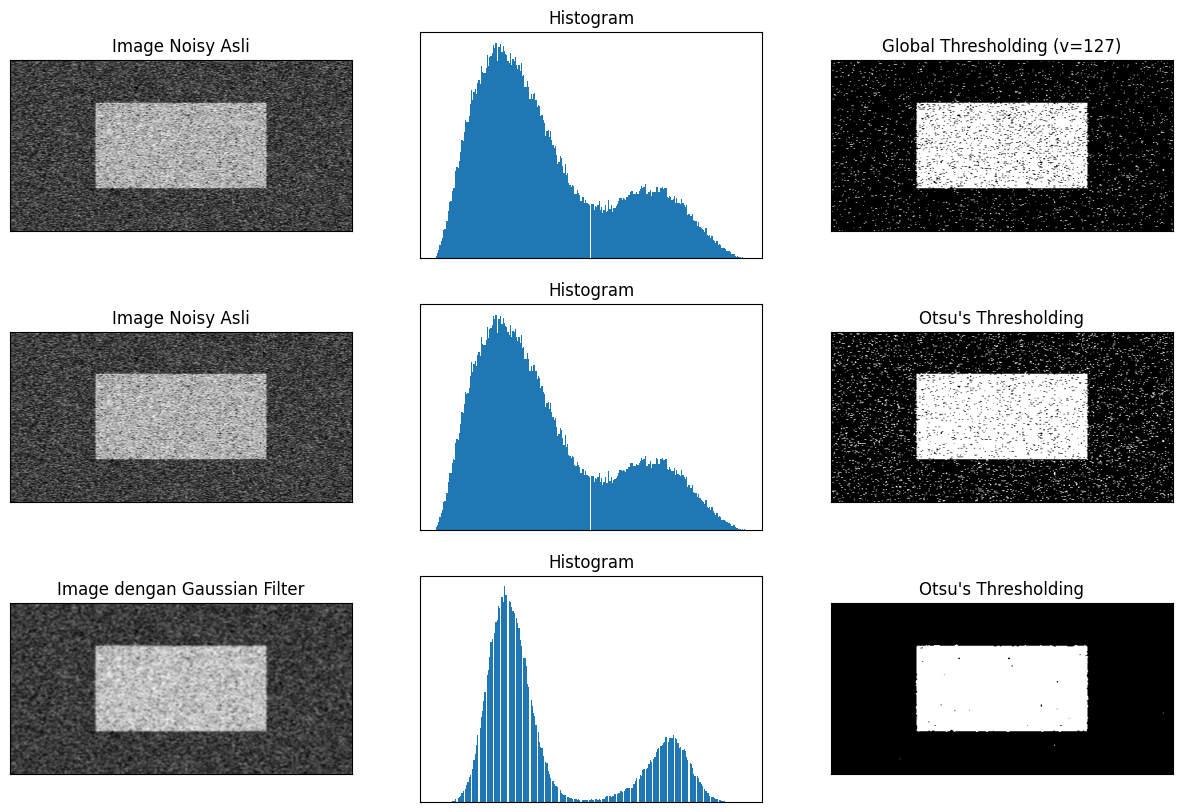

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/noisy2.png',0)

# Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plotting semua image
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)','Image Noisy Asli','Histogram',
          "Otsu's Thresholding",'Image dengan Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
  plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
  plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
  plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
  plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

## K-Means

(<Axes: >, <matplotlib.image.AxesImage at 0x7ad5547272b0>)

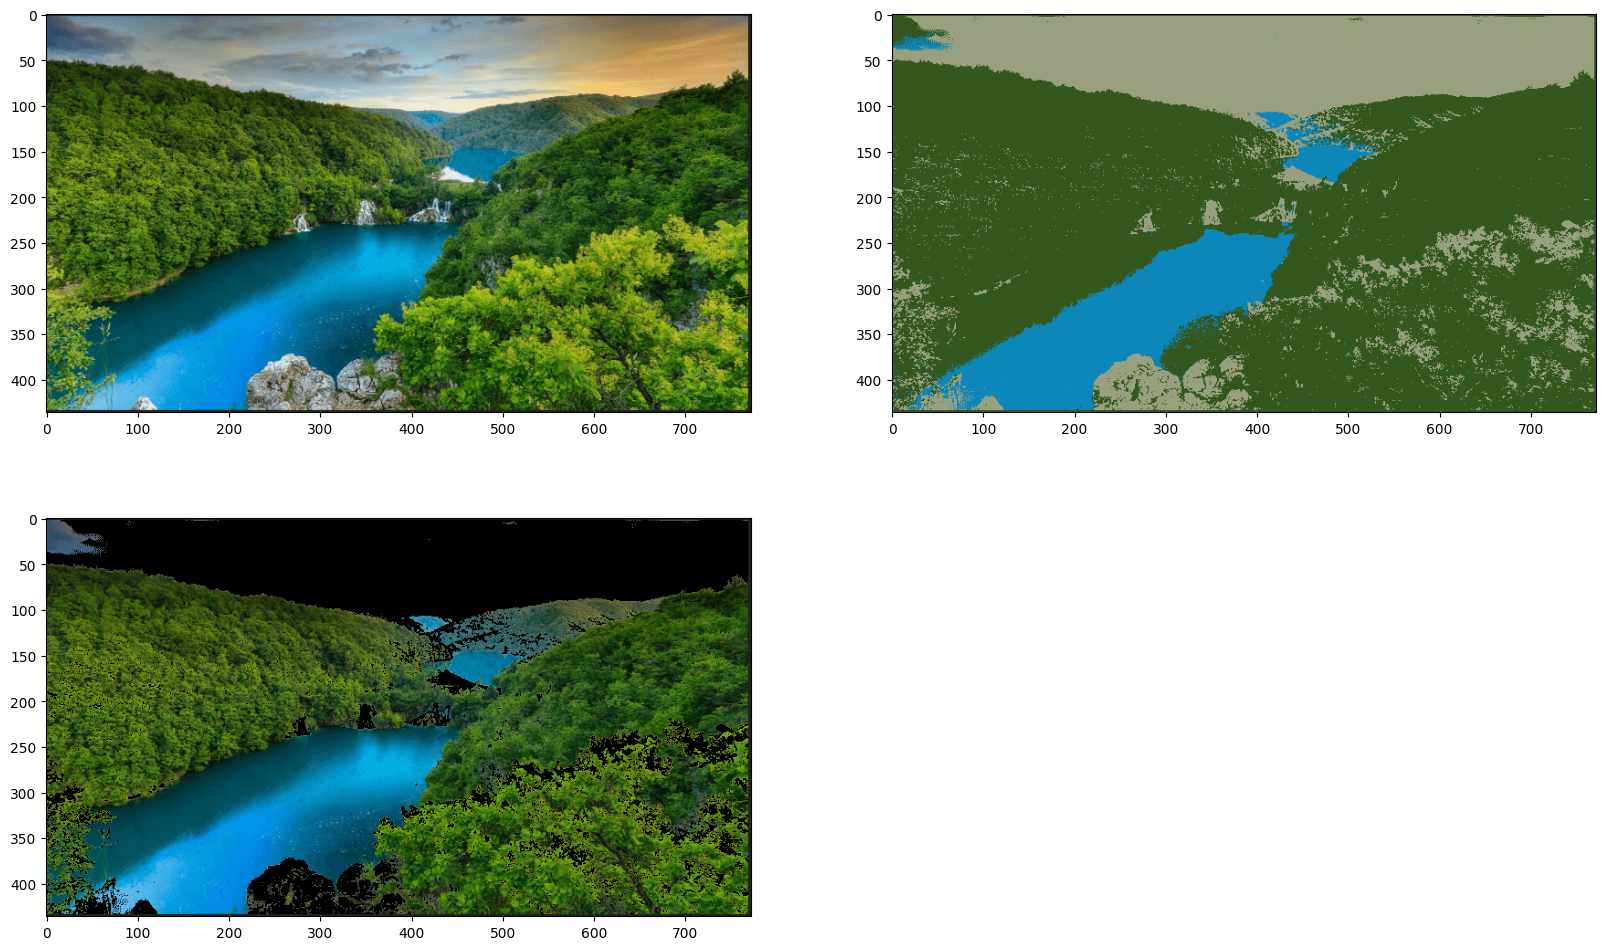

In [7]:
# K-Means Image Segmentation
jungle = cv.imread('/content/drive/MyDrive/PCVK/Images/jungle.png')
jungle = cv.cvtColor(jungle,cv.COLOR_BGR2RGB)

'''
Kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masukan,
sedangkan image aslinya adalah array 3D selanjutnya kita perlu melakukan flattening array image masukan
'''

# reshape array ke bentuk 2D
pixel_values = jungle.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

'''
Syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon (selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) < 0.2
'''

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

'''
Jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange).
Untuk percobaan ini kita akan gunakan 3 cluster untuk image ini
'''

k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# konversi titik centroid kedalam integer
centers = np.uint8(centers)
# flattening label array
labels = labels.flatten()
# konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(jungle.shape)
# ubah pixel di cluster 1 menjadi hitam
masked_image = np.copy(jungle)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-3, 3))
# cluster yang diubah
cluster = 1
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(jungle.shape)

plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(jungle)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

# Praktikum

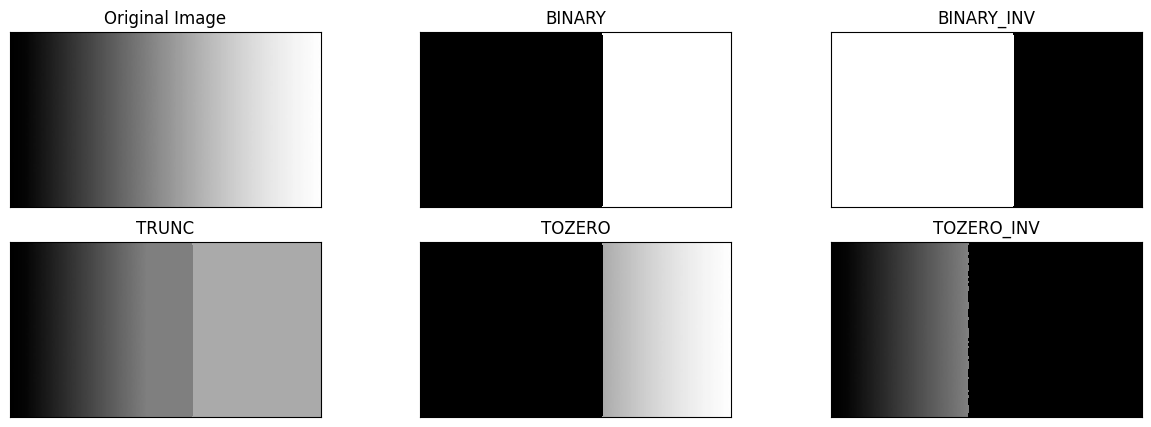

In [8]:
thresh = 170 # nilai Threshold yang ditentukan

# 1. Binary
thresh1[gradient > thresh] = 255
thresh1[gradient <= thresh] = 0
# 2. Binary Threshold Inverse
thresh2 = 255 - thresh1
# 3. Threshold Truncate
thresh3[gradient > thresh] = thresh
# 4. Threshold Tozero
thresh4[gradient <= thresh] = 0
# 5. Threshold Tozero Inverse
thresh5[gradient > thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [gradient, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

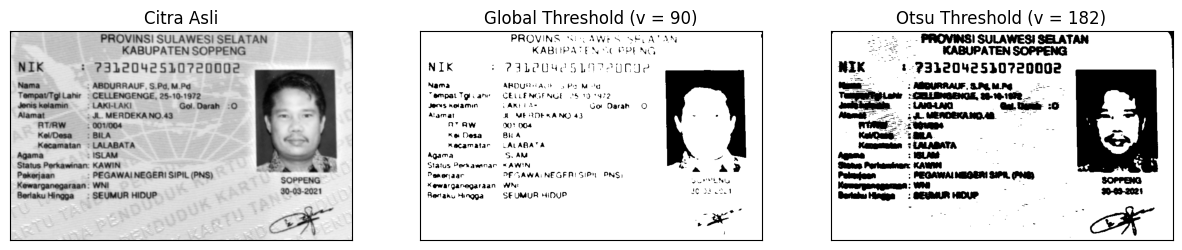

In [9]:
ktp_img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg', 0)

# Lakukan Gaussian Blur
ksize = (5, 5)
sigmaX = 0
blur = cv.GaussianBlur(ktp_img, ksize, sigmaX)

# Hitung threshold global
global_threshold = 90
_, th1 = cv.threshold(blur, global_threshold, 255, cv.THRESH_BINARY)

# Hitung threshold Otsu secara manual
hist = cv.calcHist([blur], [0], None, [256], [0, 256])
hist /= hist.sum()
variance = np.zeros((256, 1))

for t in range(256):
    q1 = np.sum(hist[:t])
    q2 = np.sum(hist[t:])
    if q1 == 0 or q2 == 0:
        continue
    m1 = np.sum(np.arange(t) * hist[:t]) / q1
    m2 = np.sum(np.arange(t, 256) * hist[t:]) / q2
    variance[t] = q1 * q2 * (m1 - m2) ** 2

ret2 = np.argmin(np.abs(variance - (150 ** 2)))

_, th2 = cv.threshold(blur, ret2, 255, cv.THRESH_BINARY)

x = "Otsu Threshold (v = " + str(ret2) + ")"
titles = ['Citra Asli', 'Global Threshold (v = 90)', x]
citra3 = [blur, th1, th2]

# Tampilkan citra
plt.figure(figsize=(15, 10))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1), plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

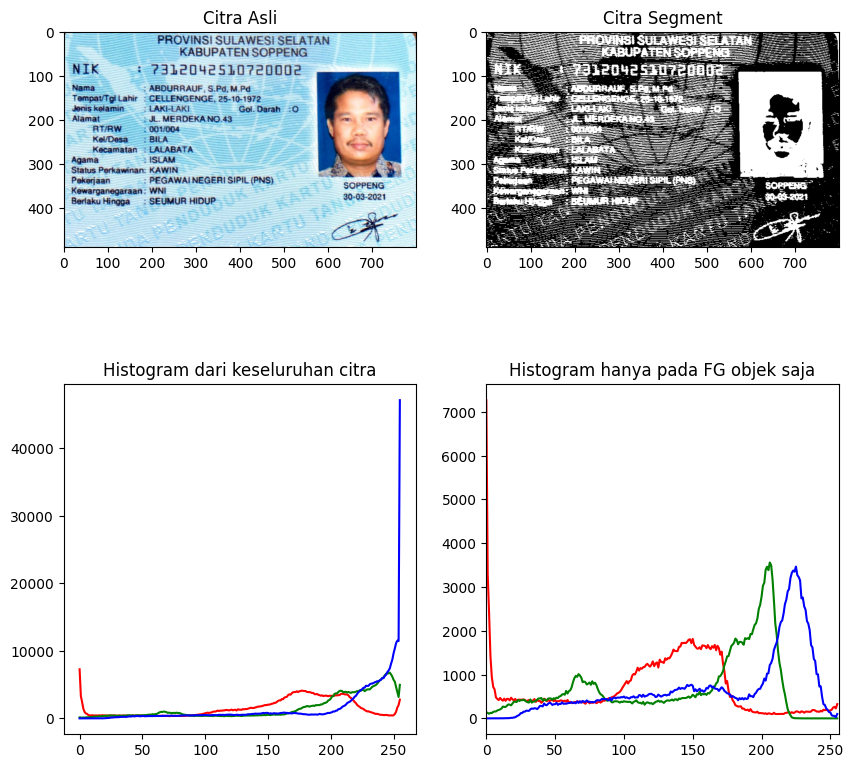

In [10]:
citra = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg')  # Load image in color
citra = cv.cvtColor(citra, cv.COLOR_BGR2RGB)  # Convert to RGB

ret3, mask = cv.threshold(cv.cvtColor(citra, cv.COLOR_RGB2GRAY), 200, 255, cv.THRESH_BINARY_INV)
# Ensure mask is single-channel and 8-bit unsigned
mask = mask.astype(np.uint8)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(citra), plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(mask, 'gray'), plt.title('Citra Segment')
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    hist0 = cv.calcHist([citra], [i], None, [256], [0, 256])
    plt.subplot(2, 2, 3), plt.plot(hist0, color=col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([citra], [i], mask, [256], [0, 256])
    plt.subplot(2, 2, 4), plt.plot(hist1, color=col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0, 256])
plt.show()

(-0.5, 799.5, 487.5, -0.5)

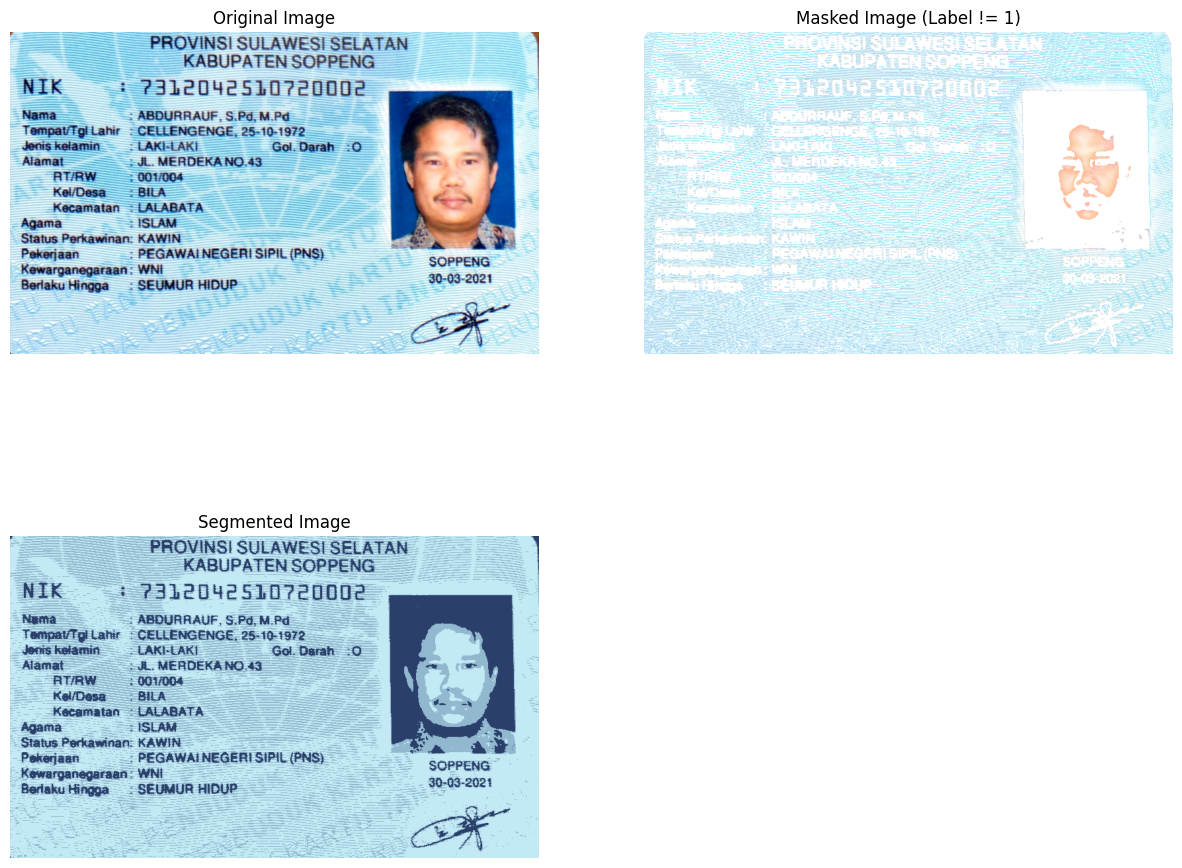

In [11]:
# reshape array ke bentuk 2D
pixel_values = citra.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Jumlah cluster
k = 3
# K-means clustering
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Konversi titik centroid ke dalam integer
centers = np.uint8(centers)
# Flattening label array
labels = labels.flatten()
# Konversi warna pixel asli ke warna dari tiap centroidnya
segmented_image = centers[labels]
# Reshape ke bentuk image asli
segmented_image = segmented_image.reshape(citra.shape)

# Membuat masked image
masked_image = np.copy(citra)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]  # Mengubah semua pixel yang tidak sesuai label 1 menjadi putih
masked_image0 = masked_image0.reshape(citra.shape)

# Menampilkan gambar
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.imshow(citra)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(masked_image0)
plt.title('Masked Image (Label != 1)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')


# Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.

In [12]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (6,472 kB/s)
debconf: unable to ini

In [13]:
import pytesseract
from pytesseract import Output
import cv2 as cv
import matplotlib.pyplot as plt

In [14]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [15]:
from pytesseract import Output
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


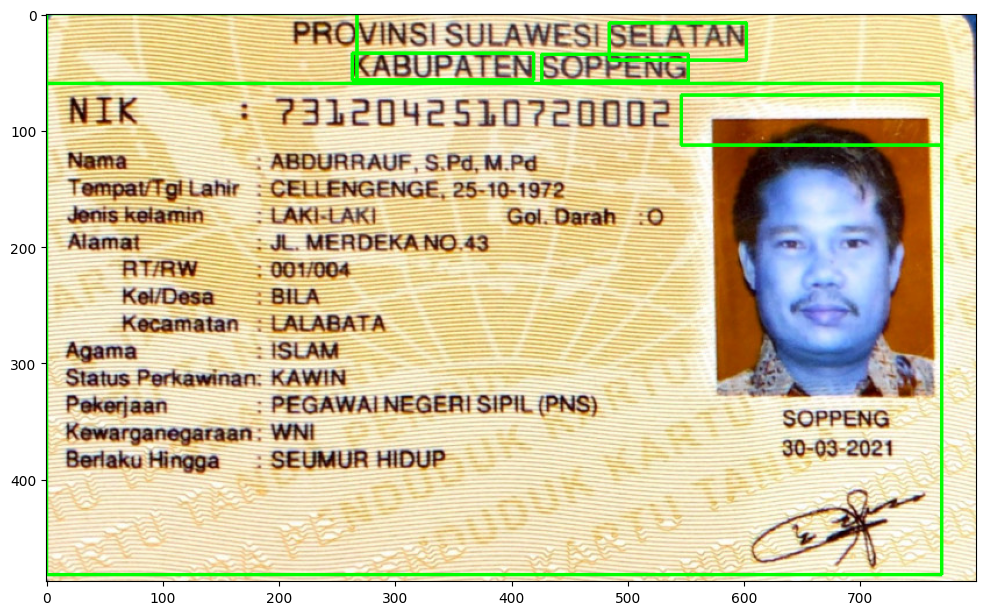

In [16]:
# ipython-input-44-4c743231d355
# Replace 'text1' with 'd' which contains the output of pytesseract.image_to_data
n_boxes = len(d['text'])
for i in range(n_boxes):
  if int(d['conf'][i]) > 60:
    # Indent the code block within the 'if' statement
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

NIK

Nama
Tempat/Tgi Lahir
Jenis kelamin
Alamat
RTRW
Kei/Desa
Kecamatan
Agama
Status Perkawinan
Pekerjaan
Kewarganegaraan
Berlaku Hingga

PROVINSI SULAWESI
KABUPATEN SOP

?31001420510720002

ABDURRAUF. S.Pd, M.Pd
CELLENGENGE. 25-10-1972
LAKI-LAKI Gol. Darah .O
JL. MERDEKA NO.43

1 001/004

BILA

LALABATA

ISLAM

KAWIN

PEGAWAI NEGERI SIPIL (PNS)
WNI

SEUMUR HIDUP

 

   

 

Aa Ad
SOPPENG
30-03-2021

TK
——



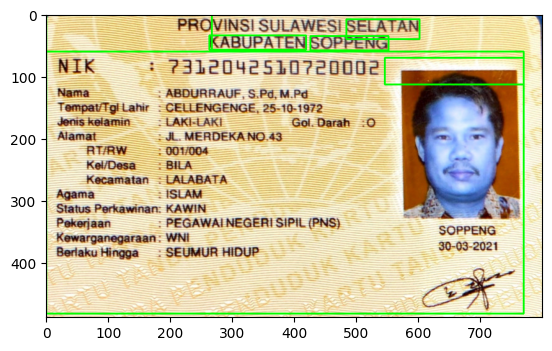

In [26]:
plt.imshow(img)
plt.imshow(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed, output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

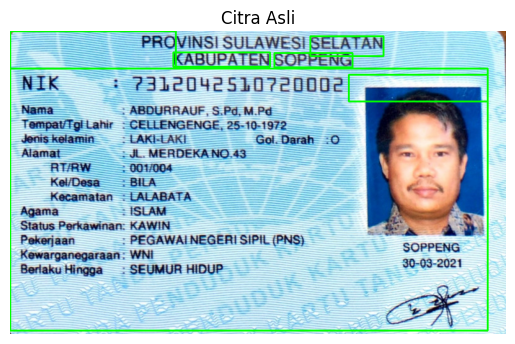

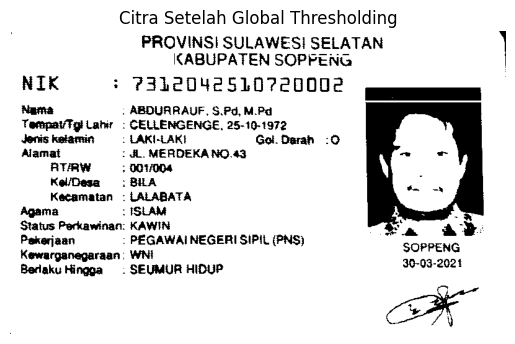

Teks yang diekstrak:
PROVINSI SULAWESI SELATAN

NIK: 7312012510720002 AN

Nama : ABDURRAUF, S.Pd, M.Pd
Tempat/Tgi Lahir : CELLENGENGE, 25-19-1972
Jenis kelamin 2 LAKI-LAKI Gol. Darah :0
Alamat 1 JL. MERDEKANO.43
RTAW 3 0017094

KellDeasa BILA
Kecamatan : LALABATA

    

Agama 2 ISLAM 3 K3 An
Status Perkawinan: KAWIN Ta A9:
Pekerjaan : PEGAWAI NEGERI SIPIL (PNS) SOPPENG
Kewarganegaraan: WN 30-03-2021

Beraku Hingga —: SEUMUR HIDUP

Ka



In [27]:
# 2. Menampilkan citra asli
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')  # Menyembunyikan sumbu
plt.title('Citra Asli')
plt.show()

# 3. Mengubah citra ke grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 4. Menerapkan Global Thresholding
# Menggunakan metode thresholding global
thresh_value = 127  # Nilai threshold
_, threshed = cv.threshold(gray, thresh_value, 255, cv.THRESH_BINARY)

# 5. Menampilkan citra hasil thresholding
plt.imshow(threshed, cmap='gray')
plt.axis('off')  # Menyembunyikan sumbu
plt.title('Citra Setelah Global Thresholding')
plt.show()

# 6. Membaca teks dari citra yang telah diproses
text = pytesseract.image_to_string(threshed, lang='ind')  # Menggunakan bahasa Indonesia
print("Teks yang diekstrak:")
print(text)